In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Path to csv file
sf_2017 = "2017_StopFrisk.csv"

# Read csv file
df_2017 = pd.read_csv(sf_2017, low_memory=False)

#df_2017

In [3]:
# Clean dataframe 
df_reduced = df_2017[['STOP_FRISK_ID', 'STOP_FRISK_TIME', 'MONTH2', 'DAY2', 'SUSPECTED_CRIME_DESCRIPTION', 
                      'STOP_DURATION_MINUTES', 'OFFICER_EXPLAINED_STOP_FLAG', 'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 
                      'SUSPECT_ARRESTED_FLAG', 'FRISKED_FLAG', 'SEARCHED_FLAG', 'OTHER_CONTRABAND_FLAG', 'FIREARM_FLAG', 
                      'KNIFE_CUTTER_FLAG', 'OTHER_WEAPON_FLAG', 'WEAPON_FOUND_FLAG', 'PHYSICAL_FORCE_CEW_FLAG', 
                      'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG', 'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG', 
                      'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG', 'PHYSICAL_FORCE_OTHER_FLAG', 
                      'PHYSICAL_FORCE_RESTRAINT_USED_FLAG', 'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG', 
                      'PHYSICAL_FORCE_WEAPON_IMPACT_FLAG', 'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG', 
                      'BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG', 'SUSPECTS_ACTIONS_CASING_FLAG', 
                      'SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG', 'SUSPECTS_ACTIONS_DECRIPTION_FLAG', 
                      'SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG', 'SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG', 
                      'SUSPECTS_ACTIONS_LOOKOUT_FLAG', 'SUSPECTS_ACTIONS_OTHER_FLAG', 
                      'SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG', 'SEARCH_BASIS_ADMISSION_FLAG', 
                      'SEARCH_BASIS_CONSENT_FLAG', 'SEARCH_BASIS_HARD_OBJECT_FLAG', 
                      'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG', 'SEARCH_BASIS_OTHER_FLAG', 
                      'SEARCH_BASIS_OUTLINE_FLAG', 'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 
                      'SUSPECT_REPORTED_AGE', 'SUSPECT_SEX', 'SUSPECT_RACE_DESCRIPTION', 'SUSPECT_HEIGHT', 
                      'SUSPECT_WEIGHT', 'SUSPECT_BODY_BUILD_TYPE', 'SUSPECT_EYE_COLOR', 'SUSPECT_HAIR_COLOR', 
                      'SUSPECT_OTHER_DESCRIPTION', 'STOP_LOCATION_BORO_NAME']]

df_reduced.head()

,STOP_FRISK_ID,STOP_FRISK_TIME,MONTH2,DAY2,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,...,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_BORO_NAME
0,1,14:26:00,January,Monday,TERRORISM,90,Y,(null),N,N,...,39,MALE,(null),5.8,130,THN,BRO,BLK,(null),MANHATTAN
1,2,14:26:00,January,Monday,TERRORISM,90,Y,(null),N,N,...,37,MALE,(null),5.8,140,MED,BRO,BLK,(null),MANHATTAN
2,3,11:10:00,February,Wednesday,OTHER,40,Y,(null),N,N,...,(null),FEMALE,WHITE,6.2,180,THN,BRO,BRO,NaN,MANHATTAN
3,4,11:35:00,February,Monday,GRAND LARCENY AUTO,40,Y,(null),N,Y,...,31,MALE,BLACK HISPANIC,5.1,190,U,BLU,BLD,UNK,MANHATTAN
4,5,13:20:00,February,Tuesday,BURGLARY,60,Y,(null),N,N,...,(null),FEMALE,BLACK,5,100,THN,BLK,BLK,(null),MANHATTAN


In [4]:
# Create five separate dataframes for each borough, and one for unknown/null locations
manhattan_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "MANHATTAN",:]
bronx_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "BRONX",:]
brooklyn_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "BROOKLYN",:]
queens_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "QUEENS",:]
staten_is_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "STATEN IS",:]
null_df = df_reduced.loc[df_reduced["STOP_LOCATION_BORO_NAME"] == "(null)",:]

# Count number of SQF incidents for each borough
manhattan = len(manhattan_df)
bronx = len(bronx_df)
brooklyn = len(brooklyn_df)
queens = len(queens_df)
staten_is = len(staten_is_df)
null = len(null_df)

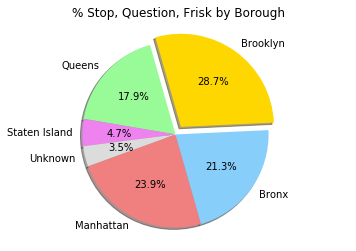

In [5]:
# Pie chart for sqf for each boro
labels = ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island", "Unknown"]
sizes = [manhattan, bronx, brooklyn, queens, staten_is, null]
colors = ["lightcoral", "lightskyblue", "gold", "palegreen", "violet", "gainsboro"]
explode = (0, 0, 0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=200)
plt.title("% Stop, Question, Frisk by Borough")
plt.axis("equal")
plt.savefig("SQF_Pie_600dpi.png", dpi=600)
plt.show()

In [6]:
# Count number of monthly SQF incidents for each borough
manhattan_month = manhattan_df["MONTH2"].value_counts()
bronx_month = bronx_df["MONTH2"].value_counts()
brooklyn_month = brooklyn_df["MONTH2"].value_counts()
queens_month = queens_df["MONTH2"].value_counts()
staten_is_month = staten_is_df["MONTH2"].value_counts()
null_month = null_df["MONTH2"].value_counts()

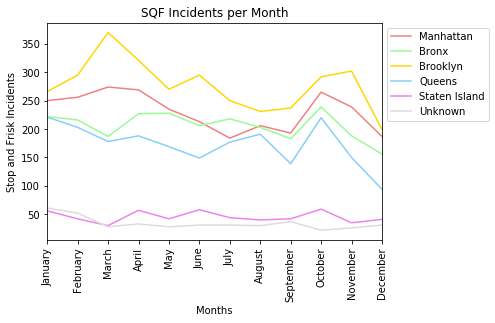

In [7]:
# Set order of months for graph
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", 
               "September", "October", "November", "December"] 

# Plot line graph for each borough
manhattan_month.loc[month_order].plot(color="lightcoral", label="Manhattan")
bronx_month.loc[month_order].plot(color="palegreen", label="Bronx")
brooklyn_month.loc[month_order].plot(color="gold", label="Brooklyn")
queens_month.loc[month_order].plot(color="lightskyblue", label="Queens")
staten_is_month.loc[month_order].plot(color="violet", label="Staten Island")
null_month.loc[month_order].plot(color="gainsboro", label="Unknown")

# Tailor, save, show graph 
plt.xticks(np.arange(12), ("January", "February", "March", "April", "May", "June", "July", "August", 
               "September", "October", "November", "December"), rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.title("SQF Incidents per Month")
plt.xlabel("Months")
plt.ylabel("Stop and Frisk Incidents")
plt.xlim(0, 11)
plt.savefig("Monthly_Data_5_Boroughs_600dpi.png", bbox_inches="tight", dpi=600)
plt.show()

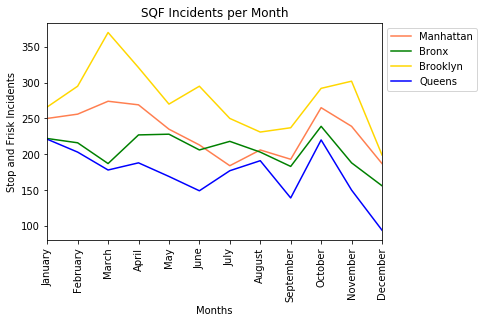

In [8]:
# Dividing the previous graph into two.  First one shows the first four boroughs.
# The second one shows Staten Island and Unknown

# Graph for first four boroughs
manhattan_month.loc[month_order].plot(color="coral", label="Manhattan")
bronx_month.loc[month_order].plot(color="green", label="Bronx")
brooklyn_month.loc[month_order].plot(color="gold", label="Brooklyn")
queens_month.loc[month_order].plot(color="blue", label="Queens")

# Tailor, save, show graph
plt.xticks(np.arange(12), ("January", "February", "March", "April", "May", "June", "July", "August", 
               "September", "October", "November", "December"), rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.title("SQF Incidents per Month")
plt.xlabel("Months")
plt.ylabel("Stop and Frisk Incidents")
plt.xlim(0, 11)
plt.savefig("Monthly_Data_4_Boroughs_600dpi.png", bbox_inches="tight", dpi=600)
plt.show()

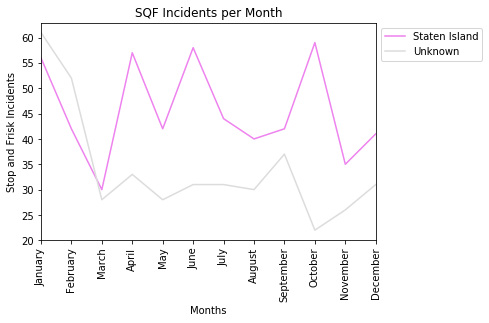

In [9]:
# Graph for Staten Island and Unkown 
staten_is_month.loc[month_order].plot(color="violet", label="Staten Island")
null_month.loc[month_order].plot(color="gainsboro", label="Unknown")

# Tailor, save, show graph
plt.xticks(np.arange(12), ("January", "February", "March", "April", "May", "June", "July", "August", 
               "September", "October", "November", "December"), rotation=90)
plt.legend(bbox_to_anchor=(1,1))
plt.title("SQF Incidents per Month")
plt.xlabel("Months")
plt.ylabel("Stop and Frisk Incidents")
plt.xlim(0, 11)
plt.savefig("Monthly_Data_1_Borough_600dpi.png", bbox_inches="tight", dpi=600)
plt.show()

In [10]:
# Count number of city wide arrests from SQF
nyc_arrests = df_reduced["SUSPECT_ARRESTED_FLAG"].value_counts()

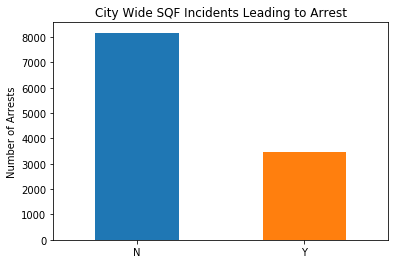

In [11]:
# Graph for city wide arrests
nyc_arrests.plot(kind="bar")

# Tailor, save, and show graph
plt.title("City Wide SQF Incidents Leading to Arrest")
plt.xticks(rotation=0)
plt.ylabel("Number of Arrests")
plt.savefig("City_Wide_Arrests.png", bbox="tight", dpi=600)
plt.show()

In [12]:
# Create data frame using Suspect Arrested Flag for each borough
manhattan_arrests = pd.DataFrame(manhattan_df["SUSPECT_ARRESTED_FLAG"].value_counts())
bronx_arrests = pd.DataFrame(bronx_df["SUSPECT_ARRESTED_FLAG"].value_counts())
brooklyn_arrests = pd.DataFrame(brooklyn_df["SUSPECT_ARRESTED_FLAG"].value_counts())
queens_arrests = pd.DataFrame(queens_df["SUSPECT_ARRESTED_FLAG"].value_counts())
staten_is_arrests = pd.DataFrame(staten_is_df["SUSPECT_ARRESTED_FLAG"].value_counts())
null_arrests = pd.DataFrame(null_df["SUSPECT_ARRESTED_FLAG"].value_counts())

# Rename columns
manhattan_arrests.columns = ["Manhattan"]
bronx_arrests.columns = ["Bronx"]
brooklyn_arrests.columns = ["Brooklyn"]
queens_arrests.columns = ["Queens"]
staten_is_arrests.columns = ["Staten Island"]
null_arrests.columns = ["Unknown"]

# Combine all 5 Arrest DataFrames 
arrests_yesno_df = pd.concat([manhattan_arrests, bronx_arrests, brooklyn_arrests, queens_arrests, 
                        staten_is_arrests, null_arrests], axis=1)
arrests_yesno_df

,Manhattan,Bronx,Brooklyn,Queens,Staten Island,Unknown
N,1793,1744,2405,1554,353,304
Y,978,729,923,525,193,106


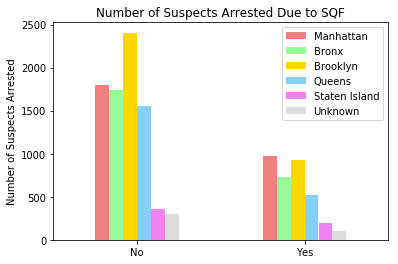

In [13]:
# Bar graph for Number of Suspects Arrested 
arrests_yesno_df.plot(kind="bar", color=["lightcoral", "palegreen", "gold", "lightskyblue", "violet", 
                             "gainsboro"])

# Tailor, save, and show graph
plt.title("Number of Suspects Arrested Due to SQF")
plt.xticks(np.arange(2),("No", "Yes"), rotation=0)
plt.ylabel("Number of Suspects Arrested")
plt.savefig("SQF_Arrests_By_YesNo.png", bbox_inches="tight", dpi=600)
plt.show()

manhattan_month.loc[month_order].plot(kind="line", color="coral")
bronx_month.loc[month_order].plot(kind="line", color="green")
plt.xticks(np.arange(12), ("January", "February", "March", "April", "May", "June", "July", "August", 
               "September", "October", "November", "December"), rotation=90)
plt.show()

In [14]:
# Transpose arrests_yesno_df to set rows according to boroughs
arrests_boroughs_df = np.transpose(arrests_yesno_df)
arrests_boroughs_df

,N,Y
Manhattan,1793,978
Bronx,1744,729
Brooklyn,2405,923
Queens,1554,525
Staten Island,353,193
Unknown,304,106


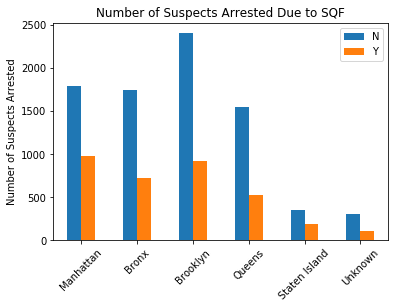

In [15]:
# Bar graph for Number of Suspects Arrested 
arrest_plot = arrests_boroughs_df.plot(kind="bar")

# Tailor, save, and show graph
plt.title("Number of Suspects Arrested Due to SQF")
plt.xticks(rotation=45)
plt.ylabel("Number of Suspects Arrested")
plt.savefig("SQF_Arrests_By_Borough.png", bbox_inches="tight", dpi=600)
plt.show()